# 코로나 확진 여부/백신 접종 여부, 건강검진 여부에 따른 심혈관 및 폐 질환, 건강행태의 관계

In [82]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

## 1. 데이터 수집 및 로딩

In [83]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## 2. 데이터 구조 및 변수 이해

In [84]:
print(df.shape)
df.info()
print(df.columns)
df.head()

(445132, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer   

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## 3. 데이터 요약 및 기술 통계


In [85]:
# 수치형 변수
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [86]:
# 범주형 변수 빈도 확인
cols = [
    'Sex','GeneralHealth','HadHeartAttack','HadAngina','HadCOPD','HadAsthma',
    'CovidPos','PneumoVaxEver','HIVTesting'
]

for col in cols:
    print(f"=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print()

=== Sex ===
Sex
Female    235893
Male      209239
Name: count, dtype: int64

=== GeneralHealth ===
GeneralHealth
Very good    148444
Good         143598
Excellent     71878
Fair          60273
Poor          19741
NaN            1198
Name: count, dtype: int64

=== HadHeartAttack ===
HadHeartAttack
No     416959
Yes     25108
NaN      3065
Name: count, dtype: int64

=== HadAngina ===
HadAngina
No     414176
Yes     26551
NaN      4405
Name: count, dtype: int64

=== HadCOPD ===
HadCOPD
No     407257
Yes     35656
NaN      2219
Name: count, dtype: int64

=== HadAsthma ===
HadAsthma
No     376665
Yes     66694
NaN      1773
Name: count, dtype: int64

=== CovidPos ===
CovidPos
No                                                               270055
Yes                                                              110877
NaN                                                               50764
Tested positive using home test without a health professional     13436
Name: count, dtype: int64

=== P

## 4. 결측치 및 이상치 탐색

In [87]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: >

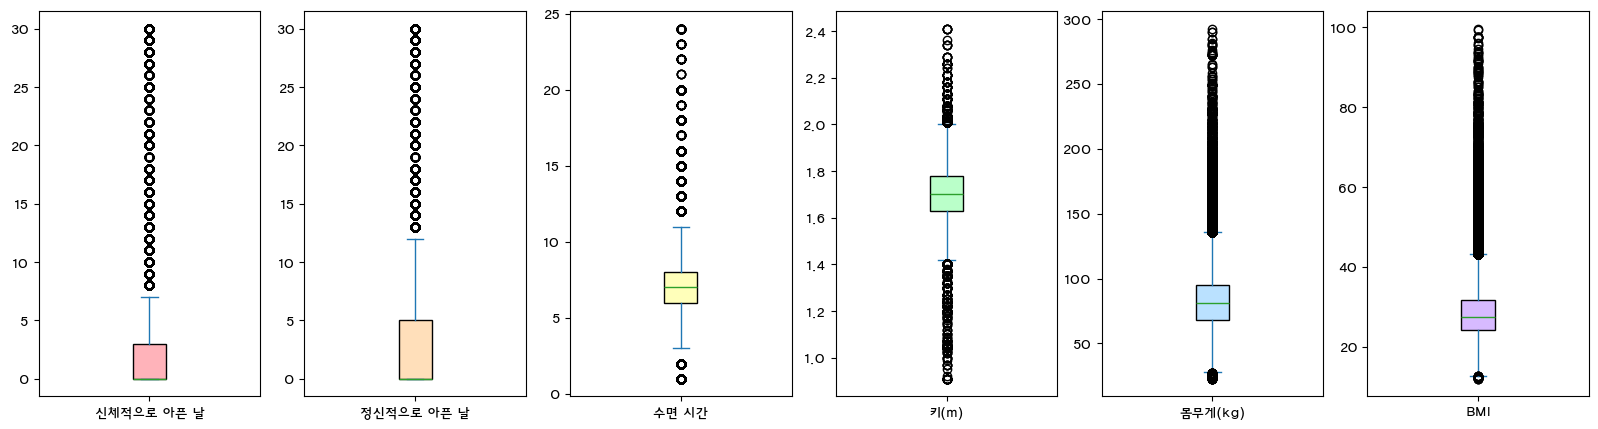

In [88]:
# 이상치 확인

fig, ax = plt.subplots(1, 6, figsize=(20,5))
df['PhysicalHealthDays'].rename('신체적으로 아픈 날').plot(kind='box', ax=ax[0],  patch_artist=True, boxprops=dict(facecolor='#FFB3BA'))
df['MentalHealthDays'].rename('정신적으로 아픈 날').plot(kind='box', ax=ax[1],  patch_artist=True, boxprops=dict(facecolor='#FFDFBA'))
df['SleepHours'].rename('수면 시간').plot(kind='box', ax=ax[2],  patch_artist=True, boxprops=dict(facecolor='#FFFFBA'))
df['HeightInMeters'].rename('키(m)').plot(kind='box', ax=ax[3],  patch_artist=True, boxprops=dict(facecolor='#BAFFC9'))
df['WeightInKilograms'].rename('몸무게(kg)').plot(kind='box', ax=ax[4],  patch_artist=True, boxprops=dict(facecolor='#BAE1FF'))
df['BMI'].plot(kind='box', ax=ax[5],  patch_artist=True, boxprops=dict(facecolor='#D7BAFF'))


## 5. 데이터 전처리

In [89]:
df_clean = df.copy()

# Yes/No → 1/0 변환
binary_cols = [
    'HadHeartAttack','HadAngina','HadStroke',
    'HadAsthma','HadCOPD',
    'AlcoholDrinkers','PhysicalActivities',
    'PneumoVaxEver','HIVTesting'
]

df_clean[binary_cols] = df_clean[binary_cols].replace({'Yes':1,'No':0})

# CovidPos 자가진단 yes 포함
df_clean['CovidBinary'] = df_clean['CovidPos'].replace({
    'Yes':1,
    'Tested positive using home test without a health professional':1,
    'No':0
})

# GeneralHealth 점수화
health_map = {
    'Poor':1,
    'Fair':2,
    'Good':3,
    'Very good':4,
    'Excellent':5
}

df_clean['GeneralHealthScore'] = df_clean['GeneralHealth'].map(health_map)

# AgeCategory → 숫자형 변환
age_map = {
    '18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5,
    '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10,
    '70-74':11, '75-79':12, '80+':13
}

df_clean['AgeCode'] = df_clean['AgeCategory'].map(age_map)

# 결측치 제거
df_clean = df_clean.dropna(subset=[
    'CovidBinary', 'PneumoVaxEver', 'GeneralHealthScore',
    'HIVTesting', 'HadHeartAttack', 'HadAngina', 'HadStroke'
])





C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8344\2817968264.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[binary_cols] = df_clean[binary_cols].replace({'Yes':1,'No':0})
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8344\2817968264.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['CovidBinary'] = df_clean['CovidPos'].replace({


## 6. Feature Engineering

In [90]:
# COPD / Asthma 개별 이진 컬럼 생성
df_clean['COPD_Binary'] = df_clean['HadCOPD'].fillna(0).astype(int)
df_clean['Asthma_Binary'] = df_clean['HadAsthma'].fillna(0).astype(int)

# CardioRiskScore 생성 (심근경색+협심증+뇌졸중)
df_clean['CardioRiskScore'] = (
    df_clean['HadHeartAttack'] +
    df_clean['HadAngina'] +
    df_clean['HadStroke']
)


# RespiratoryRiskScore 생성 (COPD + 천식)
df_clean['RespiratoryRiskScore'] = (
    df_clean['HadCOPD'] +
    df_clean['HadAsthma']
)

# BMI 카테고리화
df_clean['BMICategory'] = pd.cut(
    df_clean['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['저체중','정상','과체중','비만']
)



df_clean[['CardioRiskScore', 'RespiratoryRiskScore', 'GeneralHealthScore', 'AgeCode']].head()


,CardioRiskScore,RespiratoryRiskScore,GeneralHealthScore,AgeCode
0,0.0,0.0,4.0,NaN
1,0.0,0.0,5.0,NaN
2,0.0,0.0,4.0,NaN
3,0.0,1.0,5.0,NaN
4,0.0,0.0,2.0,NaN


## 7. 변수 분포 시각화

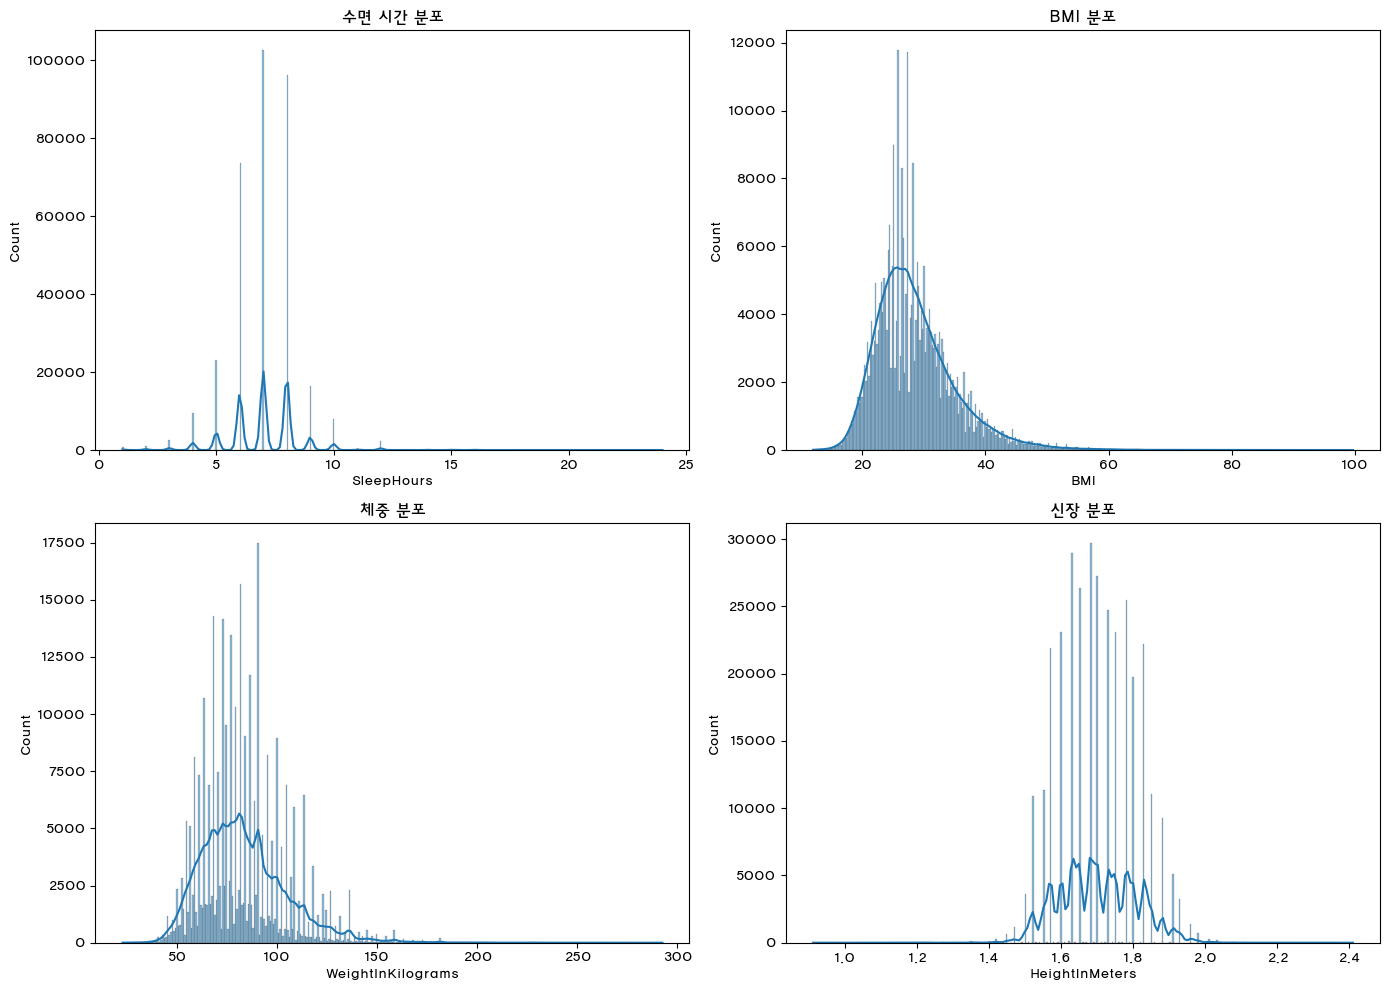

In [91]:
# 수치형 분포
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_clean['SleepHours'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("수면 시간 분포")

sns.histplot(df_clean['BMI'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("BMI 분포")

sns.histplot(df_clean['WeightInKilograms'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("체중 분포")

sns.histplot(df_clean['HeightInMeters'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("신장 분포")

plt.tight_layout()
plt.show()


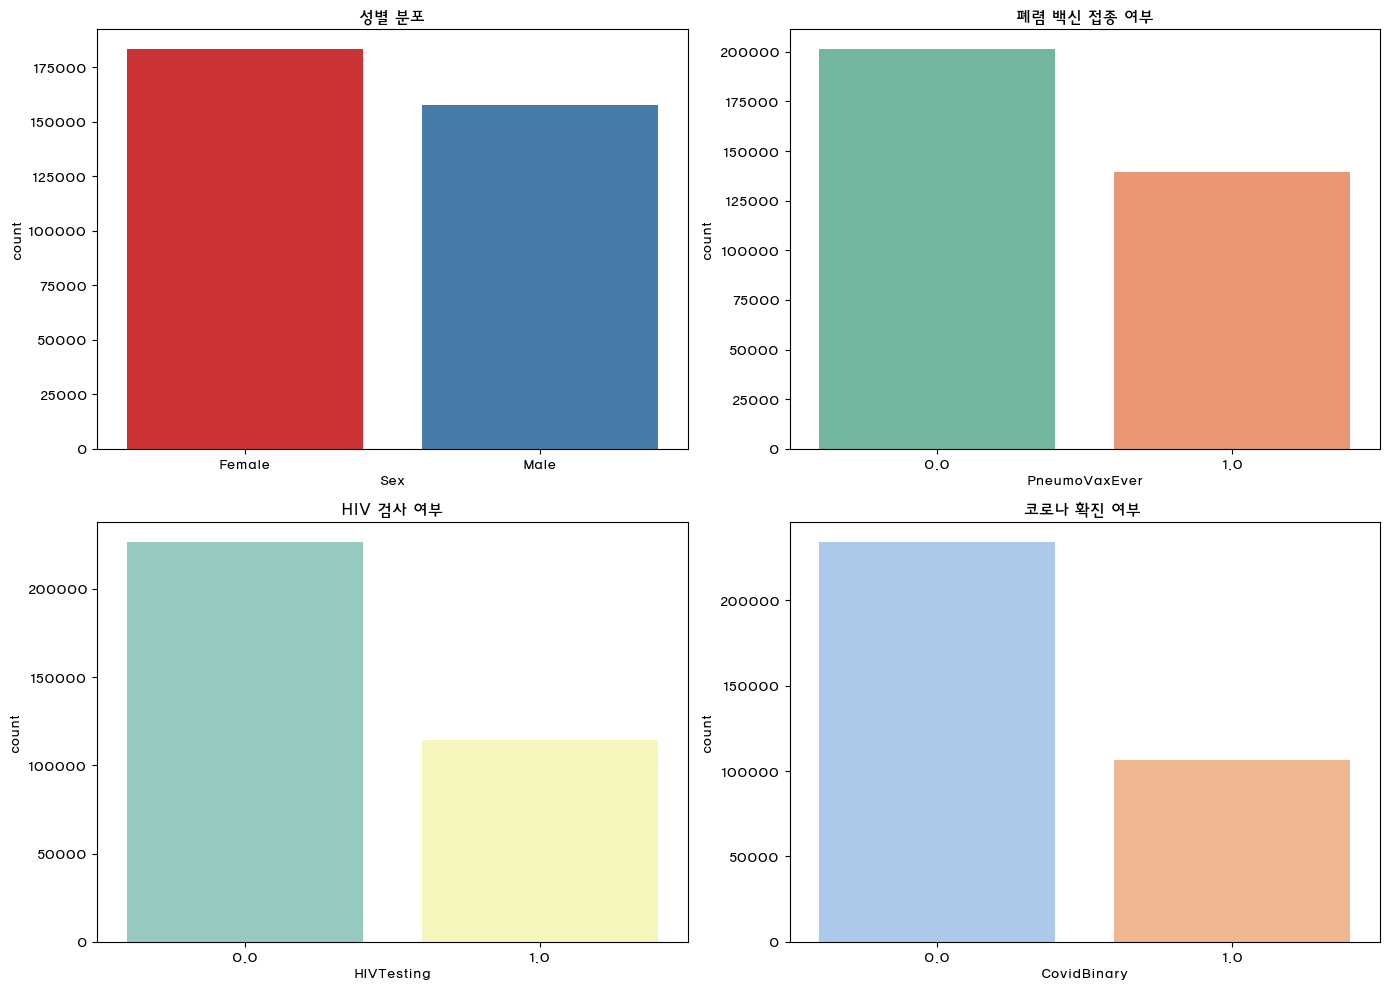

In [92]:
# 범주형 분포
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 성별
sns.countplot(
    x='Sex', data=df_clean, hue='Sex', palette="Set1", legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title("성별 분포")

# 2. 폐렴 백신
sns.countplot(
    x='PneumoVaxEver', data=df_clean, hue='PneumoVaxEver', palette="Set2", legend=False,
    ax=axes[0, 1]
)
axes[0, 1].set_title("폐렴 백신 접종 여부")

# 3. HIV 검사 여부
sns.countplot(
    x='HIVTesting', data=df_clean, hue='HIVTesting', palette="Set3", legend=False,
    ax=axes[1, 0]
)
axes[1, 0].set_title("HIV 검사 여부")

# 4. 코로나 확진 여부
sns.countplot(
    x='CovidBinary', data=df_clean, hue='CovidBinary', palette="pastel", legend=False,
    ax=axes[1, 1]
)
axes[1, 1].set_title("코로나 확진 여부 ")

plt.tight_layout()
plt.show()


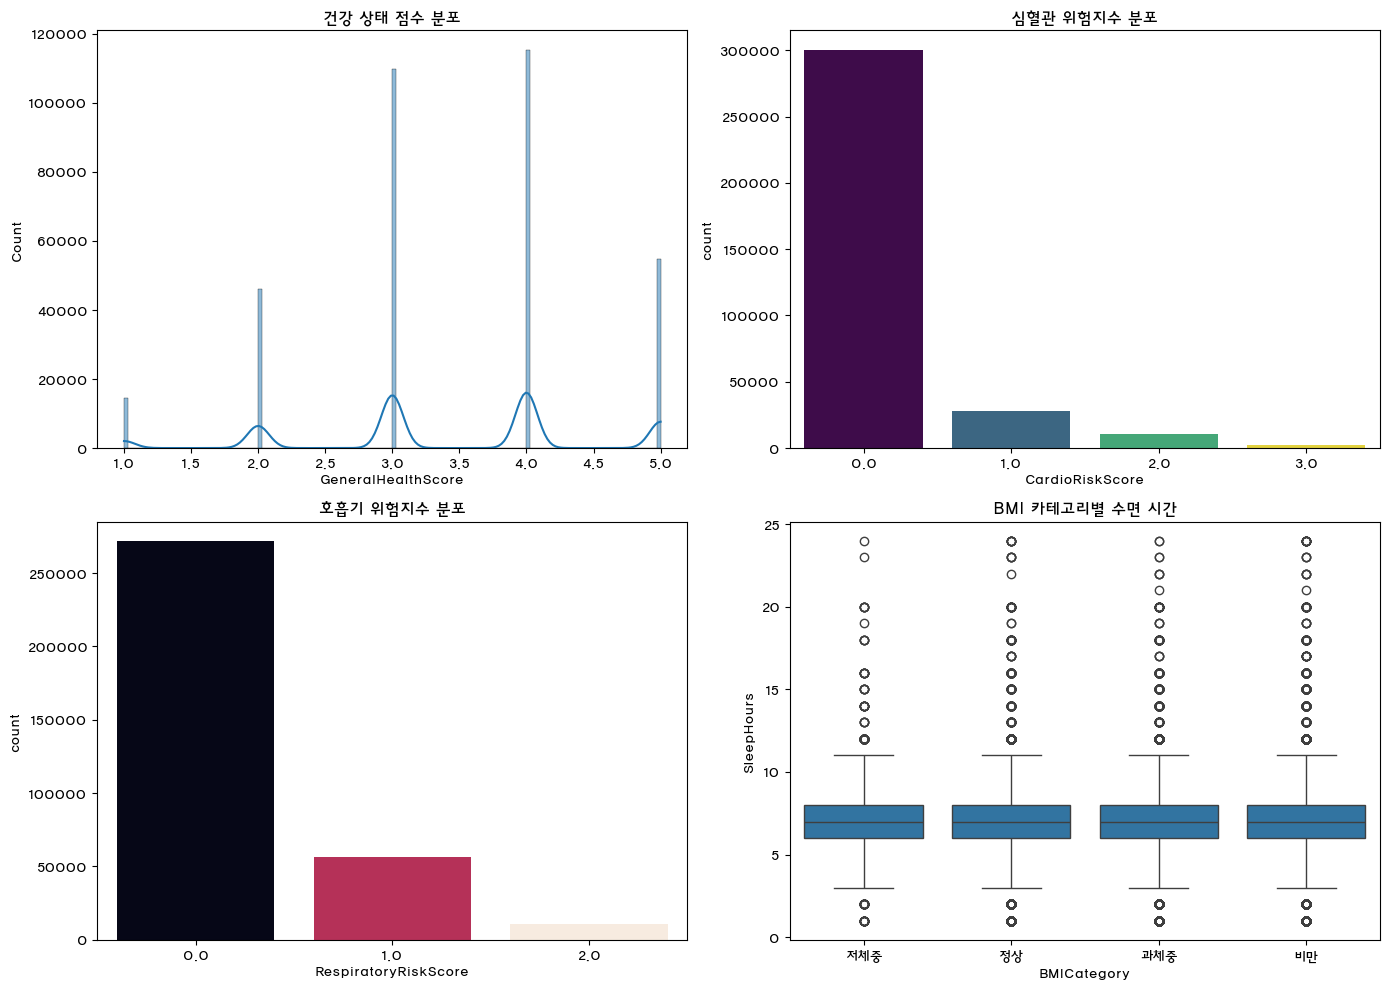

In [93]:
# Feature Engineering 변수 시각화

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. GeneralHealthScore
sns.histplot(df_clean['GeneralHealthScore'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("건강 상태 점수 분포")

# 2. CardioRiskScore
sns.countplot(
    x='CardioRiskScore', data=df_clean,
    hue='CardioRiskScore', legend=False, palette="viridis",
    ax=axes[0, 1]
)
axes[0, 1].set_title("심혈관 위험지수 분포")

# 3. RespiratoryRiskScore
sns.countplot(
    x='RespiratoryRiskScore', data=df_clean,
    hue='RespiratoryRiskScore', legend=False, palette="rocket",
    ax=axes[1, 0]
)
axes[1, 0].set_title("호흡기 위험지수 분포")

# 4. BMI 카테고리별 수면시간
sns.boxplot(x='BMICategory', y='SleepHours', data=df_clean, ax=axes[1, 1])
axes[1, 1].set_title("BMI 카테고리별 수면 시간")

plt.tight_layout()
plt.show()


## 8. 변수 간 관계 시각화

### 8-1 코로나 확진 여부와 심혈관질환 관계

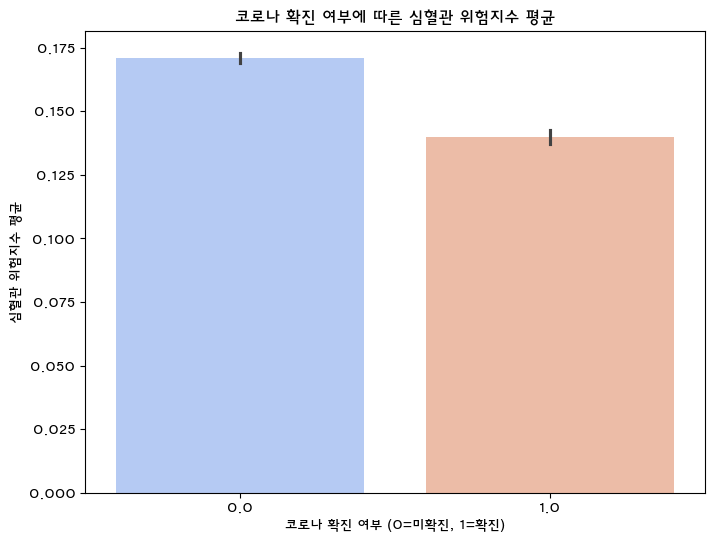

In [114]:
# 막대 그래프
plt.figure(figsize=(8,6))
sns.barplot(
    x='CovidBinary',
    y='CardioRiskScore',
    data=df_clean,
    hue='CovidBinary',
    legend=False,
    palette='coolwarm'
)
plt.title("코로나 확진 여부에 따른 심혈관 위험지수 평균")
plt.xlabel("코로나 확진 여부 (0=미확진, 1=확진)")
plt.ylabel("심혈관 위험지수 평균")
plt.show()


### 8-2. 코로나 확진 여부와 폐질환 관계

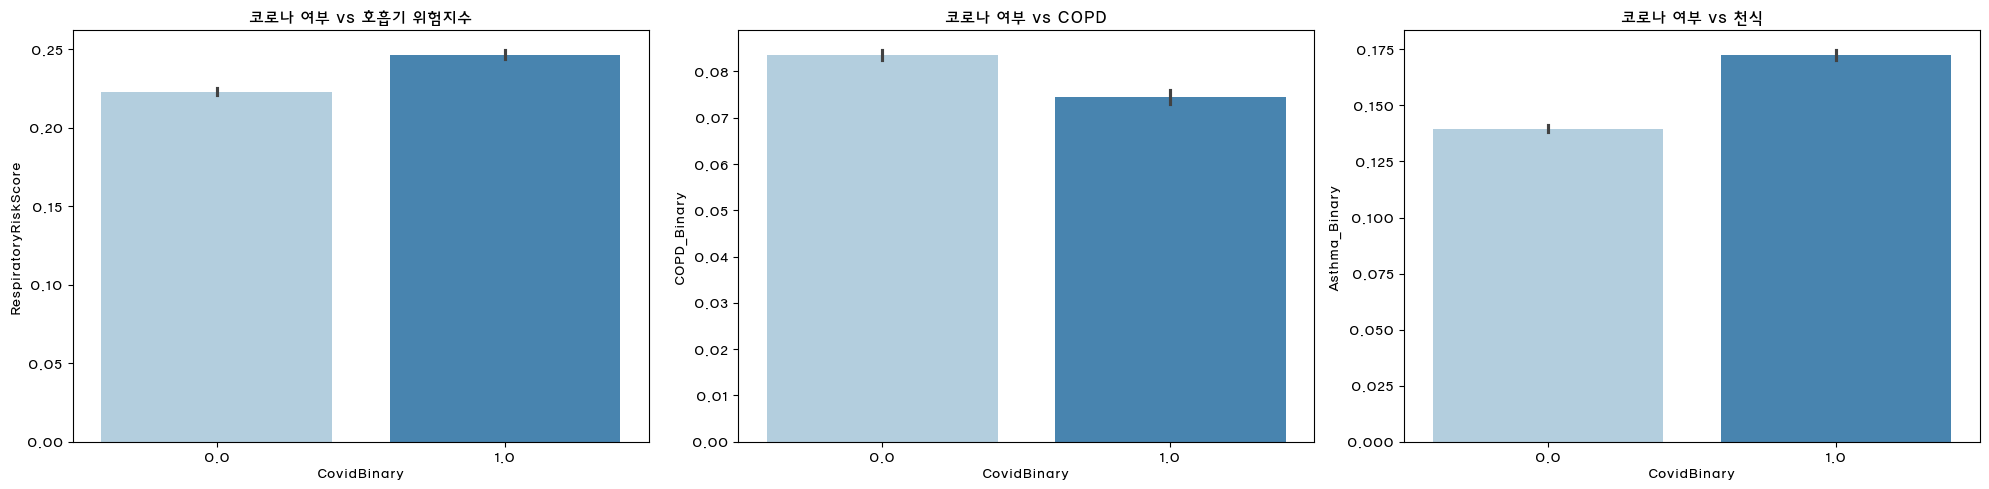

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.barplot(x='CovidBinary', y='RespiratoryRiskScore', hue='CovidBinary', data=df_clean, legend=False, palette='Blues', ax=axes[0])
axes[0].set_title("코로나 여부 vs 호흡기 위험지수")

sns.barplot(x='CovidBinary', y='COPD_Binary', hue='CovidBinary', data=df_clean, legend=False, palette='Blues', ax=axes[1])
axes[1].set_title("코로나 여부 vs COPD")

sns.barplot(x='CovidBinary', y='Asthma_Binary', hue='CovidBinary', data=df_clean, legend=False, palette='Blues', ax=axes[2])
axes[2].set_title("코로나 여부 vs 천식")

plt.tight_layout()
plt.show()



### 8-3 폐렴백신(PneumoVaxEver) 접종 여부 → 질환(심혈관/폐)

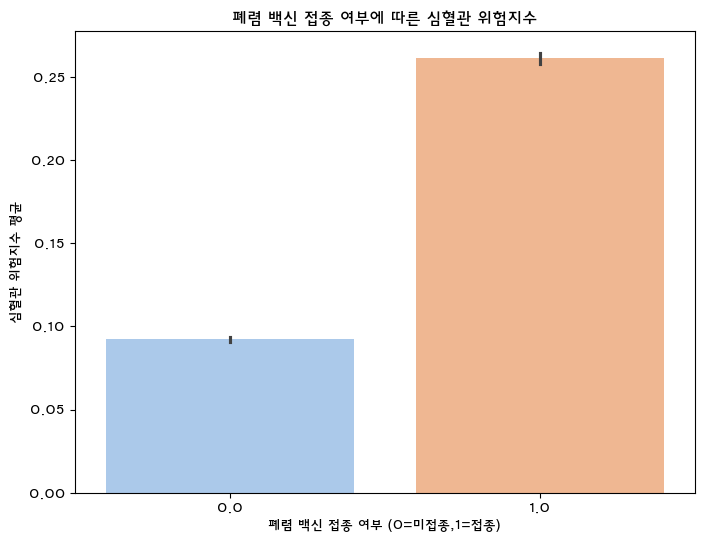

In [111]:
# 심혈관 위험지수
plt.figure(figsize=(8,6))
sns.barplot(
    x='PneumoVaxEver',
    y='CardioRiskScore',
    hue='PneumoVaxEver',
    data=df_clean,
    legend=False,
    palette='pastel'
)
plt.title("폐렴 백신 접종 여부에 따른 심혈관 위험지수")
plt.xlabel("폐렴 백신 접종 여부 (0=미접종,1=접종)")
plt.ylabel("심혈관 위험지수 평균")
plt.show()


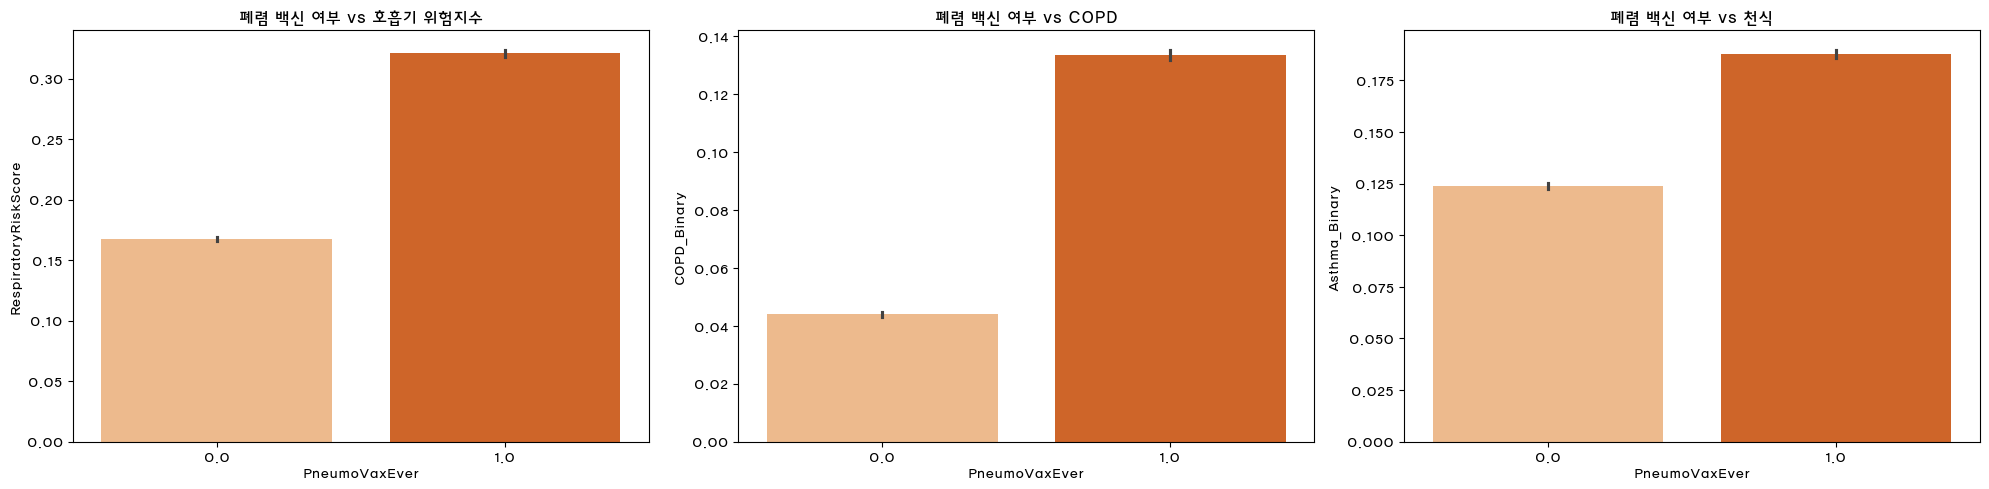

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.barplot(
    x='PneumoVaxEver', y='RespiratoryRiskScore',
    data=df_clean, hue='PneumoVaxEver',
    palette='Oranges', legend=False, ax=axes[0]
)
axes[0].set_title("폐렴 백신 여부 vs 호흡기 위험지수")

sns.barplot(
    x='PneumoVaxEver', y='COPD_Binary',
    data=df_clean, hue='PneumoVaxEver',
    palette='Oranges', legend=False, ax=axes[1]
)
axes[1].set_title("폐렴 백신 여부 vs COPD")

sns.barplot(
    x='PneumoVaxEver', y='Asthma_Binary',
    data=df_clean, hue='PneumoVaxEver',
    palette='Oranges', legend=False, ax=axes[2]
)
axes[2].set_title("폐렴 백신 여부 vs 천식")

plt.tight_layout()
plt.show()


### 8-4. 건강검진(HIVTesting) 여부 → 질환(심혈관/폐)

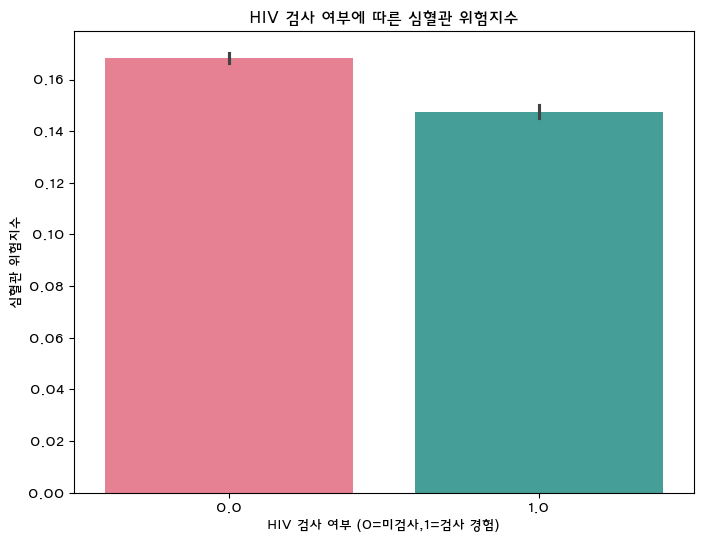

In [119]:

# 심혈관 위험지수
plt.figure(figsize=(8,6))
sns.barplot(
    x='HIVTesting',
    y='CardioRiskScore',
    data=df_clean,
    hue='HIVTesting',
    legend=False,
    palette='husl'
)
plt.title("HIV 검사 여부에 따른 심혈관 위험지수")
plt.xlabel("HIV 검사 여부 (0=미검사,1=검사 경험)")
plt.ylabel("심혈관 위험지수")
plt.show()


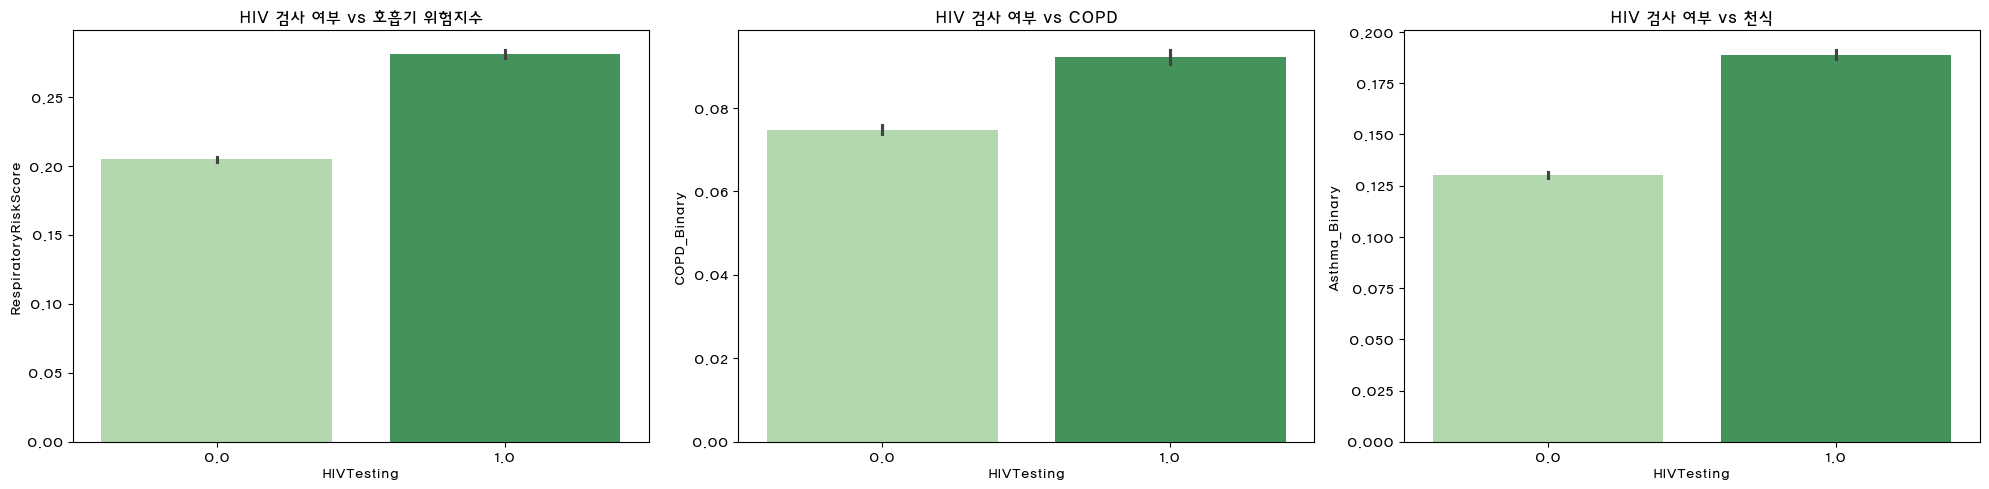

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.barplot(
    x='HIVTesting', y='RespiratoryRiskScore',
    data=df_clean, hue='HIVTesting',
    palette='Greens', legend=False, ax=axes[0]
)
axes[0].set_title("HIV 검사 여부 vs 호흡기 위험지수")

sns.barplot(
    x='HIVTesting', y='COPD_Binary',
    data=df_clean, hue='HIVTesting',
    palette='Greens', legend=False, ax=axes[1]
)
axes[1].set_title("HIV 검사 여부 vs COPD")

sns.barplot(
    x='HIVTesting', y='Asthma_Binary',
    data=df_clean, hue='HIVTesting',
    palette='Greens', legend=False, ax=axes[2]
)
axes[2].set_title("HIV 검사 여부 vs 천식")

plt.tight_layout()
plt.show()


## 9. 전체 건강요인 상관관계 Heatmap

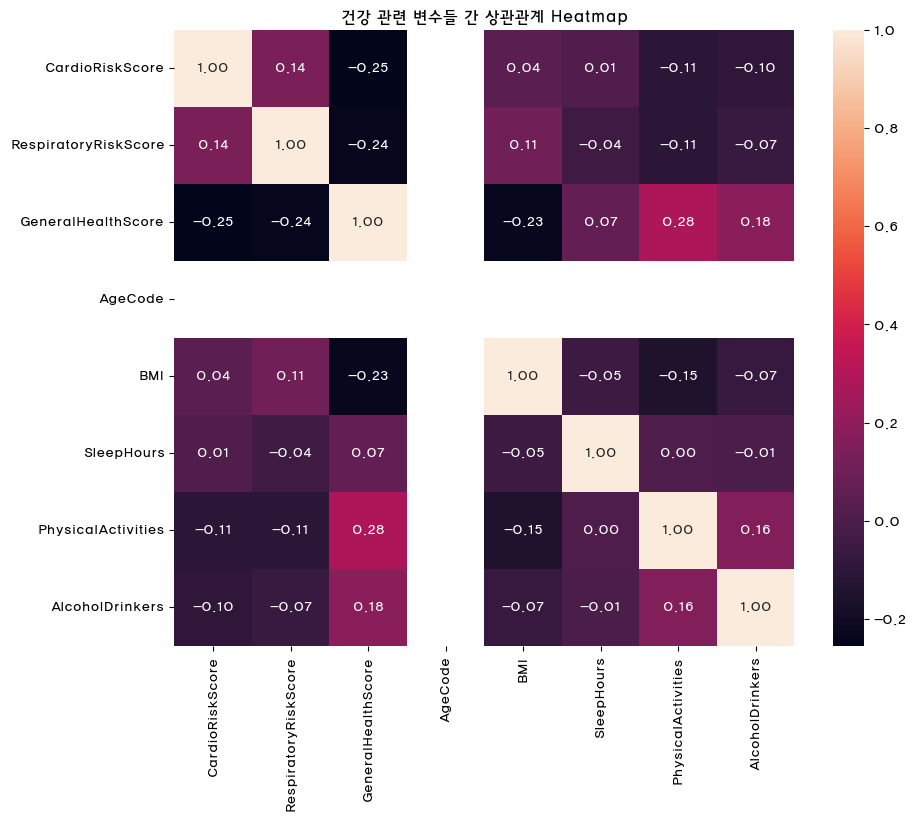

In [100]:
plt.figure(figsize=(10,8))
cols = [
    'CardioRiskScore','RespiratoryRiskScore','GeneralHealthScore',
    'AgeCode','BMI','SleepHours','PhysicalActivities','AlcoholDrinkers'
]

sns.heatmap(
    df_clean[cols].corr(),
    annot=True,
    fmt='.2f'
)
plt.title("건강 관련 변수들 간 상관관계 Heatmap")
plt.show()


## 10 인사이트 도출

### 1) 코로나 확진자들은 폐질환 위험(특히 천식)이 더 높았다

이는 감염 후 호흡기 영향 또는 기존 취약성 반영 가능성이 크다.

### 2) 코로나 확진 여부는 심혈관질환과 뚜렷한 관계가 없다

심혈관 건강은 감염 자체보다 생활습관(BMI, 운동, 흡연)이 더 중요.

### 3) 폐렴 백신 접종군이 건강지표가 낮은 이유는 ‘백신 효과’ 때문이 아니다

백신은 고위험군 중심 접종 정책을 반영한 결과로 보인다.

### 4) HIV 검사군은 건강행태 지표가 더 양호하다

의료 서비스 접근성이 높고, 건강관리 활동 비율이 높음.

### 5) 기본 건강행태(운동·BMI·수면)가 건강위험과 강한 상관성을 가진다

감염·백신·검사 여부보다 더 강한 영향력을 보임.